In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    make_scorer
)


Wczytanie danych:

In [ ]:
data = pd.read_csv("katowice.csv")

In [70]:
X = data.drop(columns=["price"])
y = data["price"]

Utworzenie tablicy results do zapisywania wyników ewaluacji modeli:

In [71]:
results = []

In [72]:
y_log = np.log1p(y)
y_log

0       13.212206
1       13.120363
2       13.066853
3       13.752348
4       13.761413
          ...    
1677    12.367345
1678    13.082585
1679    12.779876
1680    13.071072
1681    13.079458
Name: price, Length: 1682, dtype: float64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Linear Regression:

In [74]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Linear Regression:")
print(f"MAE: {mae:.2f} zł")
print(f"RMSE: {rmse:.2f} zł")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

results.append({
    "Model": "Linear Regression:",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})


Linear Regression:
MAE: 75055.36 zł
RMSE: 97121.60 zł
R²: 0.7781
MAPE: 0.1443


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)  

    # Znormalizowane metryki
    mean_price = np.mean(y_test)
    mae_norm = mae / mean_price
    rmse_norm = rmse / mean_price

    print("📊 Wyniki modelu:", model.__class__.__name__)
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"Znormalizowany MAE: {mae_norm:.4f}")
    print(f"Znormalizowany RMSE: {rmse_norm:.4f}")

    return {
        "R2": r2,
        "MAPE": mape,
        "MAE_norm": mae_norm,
        "RMSE_norm": rmse_norm
    }


In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
results1 = evaluate_model(model, X_train, y_train, X_test, y_test)


📊 Wyniki modelu: LinearRegression
R²: 0.7781
MAPE: 0.1443
Znormalizowany MAE: 0.1333
Znormalizowany RMSE: 0.1724


Logarytmowana zmienna celu dla Regresji:

In [ ]:
model = LinearRegression()

model.fit(X_train, np.log1p(y_train))
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Linear Regression z logarytmowaną zmienną celu:")
print(f"MAE: {mae:.2f} zł")
print(f"RMSE: {rmse:.2f} zł")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

results.append({
    "Model": "Linear Regression z logarytmowaną zmienną celu::",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})

Linear Regression z logarytmowaną zmienną celu:
MAE: 80169.17 zł
RMSE: 122227.79 zł
R²: 0.6485
MAPE: 0.1475


In [78]:
# plt.scatter(y_test, y_pred, alpha=0.4)
# plt.xlabel("Rzeczywista cena")
# plt.ylabel("Przewidywana cena")
# plt.title("Rzeczywista vs Przewidywana cena")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
# plt.grid(True)
# plt.show()

Random Forest:

In [79]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest:")
print(f"MAE: {mae_rf:.2f} zł")
print(f"RMSE: {rmse_rf:.2f} zł")
print(f"R²: {r2_rf:.4f}")
print(f"MAPE: {mape:.4f}")

results.append({
    "Model": "Random Forest:",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})

Random Forest:
MAE: 61332.19 zł
RMSE: 88421.00 zł
R²: 0.8161
MAPE: 0.1475


Logarytmowana zmienna celu dla Random Forest:

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, np.log1p(y_train))

y_pred_log_rf = rf.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf) 

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest z logarytmowaną zmienną celu:")
print(f"MAE: {mae_rf:.2f} zł")
print(f"RMSE: {rmse_rf:.2f} zł")
print(f"R²: {r2_rf:.4f}")
print(f"MAPE: {mape:.4f}")

results.append({
    "Model": "Random Forest z logarytmowaną zmienną celu:",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})

Random Forest z logarytmowaną zmienną celu:
MAE: 63215.47 zł
RMSE: 99252.51 zł
R²: 0.7683
MAPE: 0.1475


In [81]:
# plt.scatter(y_test, y_pred_rf, alpha=0.4)
# plt.xlabel("Rzeczywista cena")
# plt.ylabel("Przewidywana cena")
# plt.title("Rzeczywista vs Przewidywana cena")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
# plt.grid(True)
# plt.show()

XGBoost:

In [82]:
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f"XGBoost:")
print(f"XGBoost - MAE: {mae:.2f} zł")
print(f"XGBoost - RMSE: {rmse:.2f} zł")
print(f"XGBoost - R²: {r2:.4f}")
print(f"XGBoost - MAPE: {mape:.2f}")

results.append({
    "Model": "XGBoost",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})


XGBoost:
XGBoost - MAE: 55695.18 zł
XGBoost - RMSE: 79982.63 zł
XGBoost - R²: 0.8495
XGBoost - MAPE: 0.11


Logarytmowana zmienna celu dla XGBoost:

In [83]:
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

xgb.fit(X_train, np.log1p(y_train))

y_pred_log_xgb = xgb.predict(X_test)
y_pred_xgb = np.expm1(y_pred_log_xgb)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f"XGBoost z logarytmowaną zmienną celu:")
print(f"XGBoost - MAE: {mae:.2f} zł")
print(f"XGBoost - RMSE: {rmse:.2f} zł")
print(f"XGBoost - R²: {r2:.4f}")
print(f"XGBoost - MAPE: {mape:.2f}")

results.append({
    "Model": "XGBoost z logarytmowaną zmienną celu:",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})


XGBoost z logarytmowaną zmienną celu:
XGBoost - MAE: 58896.96 zł
XGBoost - RMSE: 89645.68 zł
XGBoost - R²: 0.8109
XGBoost - MAPE: 0.11


In [84]:
# plt.scatter(y_test, y_pred_xgb, alpha=0.4)
# plt.xlabel("Rzeczywista cena")
# plt.ylabel("Przewidywana cena")
# plt.title("Rzeczywista vs Przewidywana cena")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
# plt.grid(True)
# plt.show()

Standaryzacja

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MLP:

In [86]:
mlp = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64), 
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_mlp)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2 = r2_score(y_test, y_pred_mlp)
mape = mean_absolute_percentage_error(y_test, y_pred_mlp)

print(f"MLP:")
print(f"MAE: {mae:.2f} zł")
print(f"RMSE: {rmse:.2f} zł")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

results.append({
    "Model": "MLP",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})

MLP:
MAE: 68754.41 zł
RMSE: 98378.49 zł
R²: 0.7723
MAPE: 0.1347


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP na logarytmowanej zmiennej celu:

In [ ]:
# Pipeline: standaryzacja + MLP
mlp_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(100, 50),
        activation='tanh',
        alpha=0.01,
        learning_rate_init=0.01,
        max_iter=1000,
        random_state=42
    ))
])

mlp_pipeline.fit(X_train, np.log1p(y_train))

y_pred_log = mlp_pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MLPRegressor z logarytmowaną zmienną celu:")
print(f"MAE: {mae:.2f} zł")
print(f"RMSE: {rmse:.2f} zł")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2%}")

results.append({
    "Model": "MLP (log)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})


MLPRegressor z logarytmowaną zmienną celu:
MAE: 67045.41 zł
RMSE: 94820.82 zł
R²: 0.7885
MAPE: 12.50%


In [88]:
# plt.scatter(y_test, y_pred_mlp, alpha=0.4)
# plt.xlabel("Rzeczywista cena")
# plt.ylabel("Przewidywana cena")
# plt.title("Rzeczywista vs Przewidywana cena")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
# plt.grid(True)
# plt.show()

Gradient Boosting:

In [89]:
gbm = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_gbm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbm))
mse = mean_squared_error(y_test, y_pred_gbm)
r2 = r2_score(y_test, y_pred_gbm)
mape = mean_absolute_percentage_error(y_test, y_pred_gbm)

print(f"Gradient Boosting:")
print(f"Gradient Boosting - MAE: {mae:.2f} zł")
print(f"Gradient Boosting - RMSE: {rmse:.2f} zł")
print(f"Gradient Boosting - R²: {r2:.4f}")
print(f"Gradient Boosting - MAPE: {mape:.2f}")

results.append({
    "Model": "Gradient Boosting",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})

Gradient Boosting:
Gradient Boosting - MAE: 56645.19 zł
Gradient Boosting - RMSE: 78447.22 zł
Gradient Boosting - R²: 0.8552
Gradient Boosting - MAPE: 0.11


Gradient Boosting z logarytmowaną zmienną celu:

In [90]:
gbm = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gbm.fit(X_train, np.log1p(y_train))

y_pred_log_gbm = gbm.predict(X_test)
y_pred_gbm = np.expm1(y_pred_log_gbm)

mae = mean_absolute_error(y_test, y_pred_gbm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbm))
mse = mean_squared_error(y_test, y_pred_gbm)
r2 = r2_score(y_test, y_pred_gbm)
mape = mean_absolute_percentage_error(y_test, y_pred_gbm)

print(f"Gradient Boosting z logarytmowaną zmienną celu:")
print(f"Gradient Boosting - MAE: {mae:.2f} zł")
print(f"Gradient Boosting - RMSE: {rmse:.2f} zł")
print(f"Gradient Boosting - R²: {r2:.4f}")
print(f"Gradient Boosting - MAPE: {mape:.2f}")

results.append({
    "Model": "Gradient Boosting (log)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})

Gradient Boosting z logarytmowaną zmienną celu:
Gradient Boosting - MAE: 58466.62 zł
Gradient Boosting - RMSE: 85526.30 zł
Gradient Boosting - R²: 0.8279
Gradient Boosting - MAPE: 0.11


kNN (ze standaryzacją):

In [91]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
mape = mean_absolute_percentage_error(y_test, y_pred_knn)

print(f"kNN:")
print(f"kNN - MAE: {mae:.2f} zł")
print(f"kNN - RMSE: {rmse:.2f} zł")
print(f"kNN - R²: {r2:.4f}")
print(f"kNN - MAPE: {mape:.2f}")

results.append({
    "Model": "kNN",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})


kNN:
kNN - MAE: 91125.69 zł
kNN - RMSE: 120701.08 zł
kNN - R²: 0.6573
kNN - MAPE: 0.18


kNN z logarytmowaną zmienną celu:

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, np.log1p(y_train))
y_pred_log_knn = knn.predict(X_test_scaled)
y_pred_knn = np.expm1(y_pred_log_knn)

mae = mean_absolute_error(y_test, y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
mape = mean_absolute_percentage_error(y_test, y_pred_knn)

print(f"kNN z logarytmowaną zmienną celu:")
print(f"kNN - MAE: {mae:.2f} zł")
print(f"kNN - RMSE: {rmse:.2f} zł")
print(f"kNN - R²: {r2:.4f}")
print(f"kNN - MAPE: {mape:.2f}")

results.append({
    "Model": "kNN (log)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})

kNN z logarytmowaną zmienną celu:
kNN - MAE: 90268.79 zł
kNN - RMSE: 121884.74 zł
kNN - R²: 0.6505
kNN - MAPE: 0.18


SVR (ze standaryzacją):

In [93]:
svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
mape = mean_absolute_percentage_error(y_test, y_pred_svr)

print(f"SVR:")
print(f"SVR - MAE: {mae:.2f} zł")
print(f"SVR - RMSE: {rmse:.2f} zł")
print(f"SVR - R²: {r2:.4f}")
print(f"SVR - MAPE: {mape:.2f}")

results.append({
    "Model": "SVR",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})


SVR:
SVR - MAE: 161711.97 zł
SVR - RMSE: 208932.72 zł
SVR - R²: -0.0269
SVR - MAPE: 0.31


SVR z logarytmowaną zmienną celu:

In [94]:
svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr.fit(X_train_scaled, np.log1p(y_train))
y_pred_log_svr = svr.predict(X_test_scaled)
y_pred_svr = np.expm1(y_pred_log_svr)

mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
mape = mean_absolute_percentage_error(y_test, y_pred_svr)

print(f"SVR z logarytmowaną zmienną celu:")
print(f"SVR - MAE: {mae:.2f} zł")
print(f"SVR - RMSE: {rmse:.2f} zł")
print(f"SVR - R²: {r2:.4f}")
print(f"SVR - MAPE: {mape:.2f}")

results.append({
    "Model": "SVR (log)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})

SVR z logarytmowaną zmienną celu:
SVR - MAE: 68856.31 zł
SVR - RMSE: 94143.89 zł
SVR - R²: 0.7915
SVR - MAPE: 0.13


In [95]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("R2", ascending=False)
results_df.reset_index(drop=True, inplace=True)

display(results_df)


,Model,MAE,RMSE,R2,MAPE
0,Gradient Boosting,56645.185317,78447.222946,0.855228,0.105818
1,XGBoost,55695.181152,79982.627389,0.849506,0.107350
2,Gradient Boosting (log),58466.615756,85526.297953,0.827921,0.107479
3,XGBoost z logarytmowaną zmienną celu:,58896.961614,89645.675232,0.810945,0.108651
4,SVR (log),68856.310259,94143.893968,0.791496,0.133825
5,MLP (log),67045.406530,94820.821543,0.788487,0.124985
6,Linear Regression:,75055.355825,97121.599609,0.778098,0.144318
7,MLP,68754.414421,98378.494320,0.772318,0.134676
8,kNN,91125.693098,120701.077366,0.657271,0.184487
9,kNN (log),90268.785736,121884.735450,0.650516,0.176635


Próbujemy tu poprawiać wyniki modeli:

In [96]:
results_tuned = []

TUNNING parametrów dla XGBoost:

In [97]:
model = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=25,
    scoring=scorer,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


print("\n📊 XGBoost (price)")
print("Najlepsze parametry:", search.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "XGBoost",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})

Fitting 3 folds for each of 25 candidates, totalling 75 fits

📊 XGBoost (price)
Najlepsze parametry: {'subsample': 0.8, 'n_estimators': 700, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
R²: 0.8709, MAE: 53979, RMSE: 74082, MAPE: 10.24%


In [ ]:
model = XGBRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=25,
    scoring=scorer,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# UWAGA: logarytmujemy już teraz, bo y_train i y_test muszą być logarytmowane
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

search.fit(X_train, y_train_log)
best_model = search.best_estimator_

y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_true = np.expm1(y_test_log)

mae = mean_absolute_error(y_test_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
r2 = r2_score(y_test_true, y_pred)
mape = np.mean(np.abs((y_test_true - y_pred) / y_test_true)) * 100

print("\nXGBoost (log)")
print("Najlepsze parametry:", search.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "XGBoost (log)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})


Fitting 3 folds for each of 25 candidates, totalling 75 fits

📊 XGBoost (log)
Najlepsze parametry: {'subsample': 0.6, 'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
R²: 0.8427, MAE: 54067, RMSE: 81768, MAPE: 10.03%


TUNNING parametrów dla Gradient Boosting:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0]
}

scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=25,
    scoring=scorer,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nGradient Boosting (price)")
print("Najlepsze parametry:", search.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "Gradient Boosting",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})


Fitting 3 folds for each of 25 candidates, totalling 75 fits

📊 Gradient Boosting (price)
Najlepsze parametry: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.05}
R²: 0.8583, MAE: 54296, RMSE: 77600, MAPE: 10.18%


In [ ]:
model = GradientBoostingRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=25,
    scoring=scorer,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# log 
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

search.fit(X_train, y_train_log)
best_model = search.best_estimator_

y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_true = np.expm1(y_test_log)

mae = mean_absolute_error(y_test_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
r2 = r2_score(y_test_true, y_pred)
mape = np.mean(np.abs((y_test_true - y_pred) / y_test_true)) * 100

print("\n📊 Gradient Boosting (log)")
print("Najlepsze parametry:", search.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "Gradient Boosting (log)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})


Fitting 3 folds for each of 25 candidates, totalling 75 fits

📊 Gradient Boosting (log)
Najlepsze parametry: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.05}
R²: 0.8326, MAE: 55105, RMSE: 84357, MAPE: 10.14%


TUNNING dla kNN:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor())
])

param_grid = {
    'knn__n_neighbors': list(range(1, 51)),
    'knn__weights': ['uniform', 'distance']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nkNN (price)")
print("Najlepsze parametry:", grid.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "kNN",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})



📊 kNN (price)
Najlepsze parametry: {'knn__n_neighbors': 8, 'knn__weights': 'distance'}
R²: 0.7218, MAE: 78849, RMSE: 108747, MAPE: 15.79%


In [ ]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor())
])

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

grid.fit(X_train, y_train_log)
best_model = grid.best_estimator_

y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_true = np.expm1(y_test_log)

mae = mean_absolute_error(y_test_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
r2 = r2_score(y_test_true, y_pred)
mape = np.mean(np.abs((y_test_true - y_pred) / y_test_true)) * 100

print("\n📊 kNN (log)")
print("Najlepsze parametry:", grid.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "kNN (log)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})



📊 kNN (log)
Najlepsze parametry: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
R²: 0.7159, MAE: 77965, RMSE: 109902, MAPE: 15.21%


TUNNING dla SVR:

In [103]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.5],
    'svr__kernel': ['linear', 'rbf']
}

grid = GridSearchCV(pipe, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n📊 SVR (price)")
print("Najlepsze parametry:", grid.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "SVR",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})



📊 SVR (price)
Najlepsze parametry: {'svr__C': 100, 'svr__epsilon': 0.01, 'svr__kernel': 'linear'}
R²: 0.6088, MAE: 98358, RMSE: 128954, MAPE: 18.53%


In [ ]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

grid = GridSearchCV(pipe, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

grid.fit(X_train, y_train_log)
best_model = grid.best_estimator_

y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_true = np.expm1(y_test_log)

mae = mean_absolute_error(y_test_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
r2 = r2_score(y_test_true, y_pred)
mape = np.mean(np.abs((y_test_true - y_pred) / y_test_true)) * 100

print("\n📊 SVR (log)")
print("Najlepsze parametry:", grid.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "SVR (log)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})



📊 SVR (log)
Najlepsze parametry: {'svr__C': 1, 'svr__epsilon': 0.01, 'svr__kernel': 'rbf'}
R²: 0.8217, MAE: 59998, RMSE: 87070, MAPE: 11.52%


TUNNING dla Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=25,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search_rf.fit(X_train, y_train)
best_rf = search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print("📊 Random Forest (price)")
print("Najlepsze parametry:", search_rf.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "Random Forest",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})


Fitting 3 folds for each of 25 candidates, totalling 75 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", l

📊 Random Forest (price)
Najlepsze parametry: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
R²: 0.8371, MAE: 58943, RMSE: 83214, MAPE: 11.60%


In [ ]:
search_rf.fit(X_train, np.log1p(y_train))
best_rf_log = search_rf.best_estimator_
y_pred_log_rf = best_rf_log.predict(X_test)

y_pred_rf = np.expm1(y_pred_log_rf)
y_test_true = y_test  # nadal na skali ceny

mae = mean_absolute_error(y_test_true, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test_true, y_pred_rf))
r2 = r2_score(y_test_true, y_pred_rf)
mape = np.mean(np.abs((y_test_true - y_pred_rf) / y_test_true)) * 100

print("📊 Random Forest (log_price)")
print("Najlepsze parametry:", search_rf.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "Random Forest (log)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})

Fitting 3 folds for each of 25 candidates, totalling 75 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", l

📊 Random Forest (log_price)
Najlepsze parametry: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
R²: 0.8255, MAE: 58670, RMSE: 86126, MAPE: 10.87%


TUNNING dla MLP:

In [107]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(max_iter=1000, random_state=42))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(pipe, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n📊 MLP (price)")
print("Najlepsze parametry:", grid.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "MLP",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})



📊 MLP (price)
Najlepsze parametry: {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__learning_rate_init': 0.01}
R²: 0.7980, MAE: 67938, RMSE: 92653, MAPE: 13.54%


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [108]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(max_iter=1000, random_state=42))
])

grid = GridSearchCV(pipe, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# log transform
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

grid.fit(X_train, y_train_log)
best_model = grid.best_estimator_

y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_true = np.expm1(y_test_log)

mae = mean_absolute_error(y_test_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
r2 = r2_score(y_test_true, y_pred)
mape = np.mean(np.abs((y_test_true - y_pred) / y_test_true)) * 100

print("\n📊 MLP (log)")
print("Najlepsze parametry:", grid.best_params_)
print(f"R²: {r2:.4f}, MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "MLP (log)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})



📊 MLP (log)
Najlepsze parametry: {'mlp__activation': 'tanh', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__learning_rate_init': 0.01}
R²: 0.7885, MAE: 67045, RMSE: 94821, MAPE: 12.50%


ULTIMATE STACKED MODEL: 

In [ ]:
xgb_best = XGBRegressor(
    subsample=0.8,
    n_estimators=700,
    max_depth=4,
    learning_rate=0.05,
    colsample_bytree=0.6,
    random_state=42
)

gbr_best = GradientBoostingRegressor(
    subsample=0.6,
    n_estimators=1000,
    max_depth=4,
    learning_rate=0.05,
    random_state=42
)

mlp_best = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        activation='tanh',
        alpha=0.01,
        hidden_layer_sizes=(100, 50),
        learning_rate_init=0.01,
        max_iter=1000,
        random_state=42
    ))
])

# Stacking model
stack_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_best),
        ('gbr', gbr_best),
        ('mlp', mlp_best)
    ],
    final_estimator=LinearRegression(),
    n_jobs=-1
)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

stack_model.fit(X_train, y_train_log)

y_pred_log = stack_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_true = np.expm1(y_test_log)

mae = mean_absolute_error(y_test_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
r2 = r2_score(y_test_true, y_pred)
mape = np.mean(np.abs((y_test_true - y_pred) / y_test_true)) * 100

print("\nFINALNY STACKING")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.0f}")
print(f"RMSE: {rmse:.0f}")
print(f"MAPE: {mape:.2f}%")

results_tuned.append({
    "Model": "Stacking (log)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "MAPE": mape
})



📊 FINALNY STACKING
R²: 0.8467
MAE: 54150
RMSE: 80733
MAPE: 9.99%


Wyniki przed tunningiem parametrów:

In [110]:
# # Przelicz MAPE z ułamków dziesiętnych na procenty w results
# for r in results:
#     r["MAPE"] = r["MAPE"] / 100

results_df = pd.DataFrame(results)
results_df = results_df.sort_values("R2", ascending=False)
results_df.reset_index(drop=True, inplace=True)

display(results_df)

,Model,MAE,RMSE,R2,MAPE
0,Gradient Boosting,56645.185317,78447.222946,0.855228,0.105818
1,XGBoost,55695.181152,79982.627389,0.849506,0.107350
2,Gradient Boosting (log),58466.615756,85526.297953,0.827921,0.107479
3,XGBoost z logarytmowaną zmienną celu:,58896.961614,89645.675232,0.810945,0.108651
4,SVR (log),68856.310259,94143.893968,0.791496,0.133825
5,MLP (log),67045.406530,94820.821543,0.788487,0.124985
6,Linear Regression:,75055.355825,97121.599609,0.778098,0.144318
7,MLP,68754.414421,98378.494320,0.772318,0.134676
8,kNN,91125.693098,120701.077366,0.657271,0.184487
9,kNN (log),90268.785736,121884.735450,0.650516,0.176635


Wyniki po tunningu parametrów:

In [ ]:
for r in results_tuned:
    r["MAPE"] = r["MAPE"] / 100

results_df1 = pd.DataFrame(results_tuned)
results_df1 = results_df1.sort_values("R2", ascending=False)
results_df1.reset_index(drop=True, inplace=True)

display(results_df1)


,Model,MAE,RMSE,R2,MAPE
0,XGBoost,53978.547203,74082.033462,0.870891,0.102430
1,Gradient Boosting,54295.879123,77599.686933,0.858339,0.101781
2,Stacking (log),54150.255270,80732.644119,0.846670,0.099852
3,XGBoost (log),54067.139562,81767.547266,0.842714,0.100331
4,Random Forest,58942.635754,83213.735170,0.837101,0.116007
5,Gradient Boosting (log),55105.074665,84356.732205,0.832595,0.101398
6,Random Forest (log),58670.020481,86125.841602,0.825500,0.108676
7,SVR (log),59997.519525,87070.115083,0.821652,0.115235
8,MLP,67937.558563,92652.687176,0.798049,0.135384
9,MLP (log),67045.406530,94820.821543,0.788487,0.124985


C:\Users\DELL\AppData\Local\Temp\ipykernel_9704\306605537.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="R2", y="Model", palette="viridis")


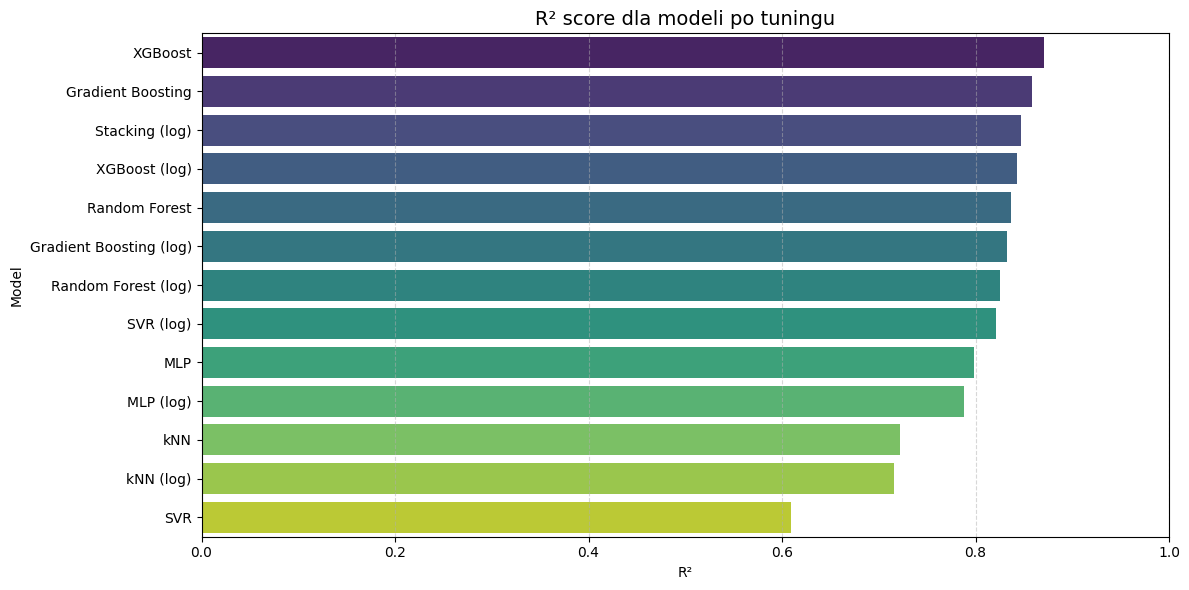

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(results_tuned).sort_values("R2", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="R2", y="Model", palette="viridis")

plt.title("R² score dla modeli po tuningu", fontsize=14)
plt.xlabel("R²")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


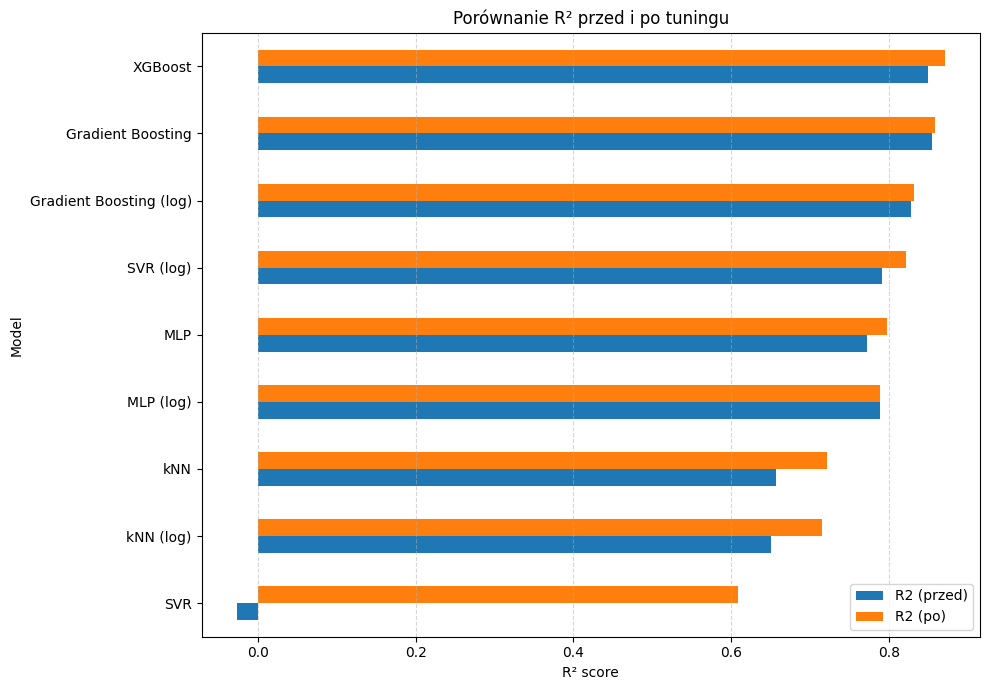

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

r2_df = pd.DataFrame({
    "Model": [m["Model"] for m in results],
    "R2 (przed)": [m["R2"] for m in results],
})

r2_df = r2_df.merge(
    pd.DataFrame({
        "Model": [m["Model"] for m in results_tuned],
        "R2 (po)": [m["R2"] for m in results_tuned],
    }),
    on="Model",
    how="inner"
)

r2_df.set_index("Model")[["R2 (przed)", "R2 (po)"]].sort_values("R2 (po)").plot(kind="barh", figsize=(10, 7))
plt.title("Porównanie R² przed i po tuningu")
plt.xlabel("R² score")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9704\767426820.py:16: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


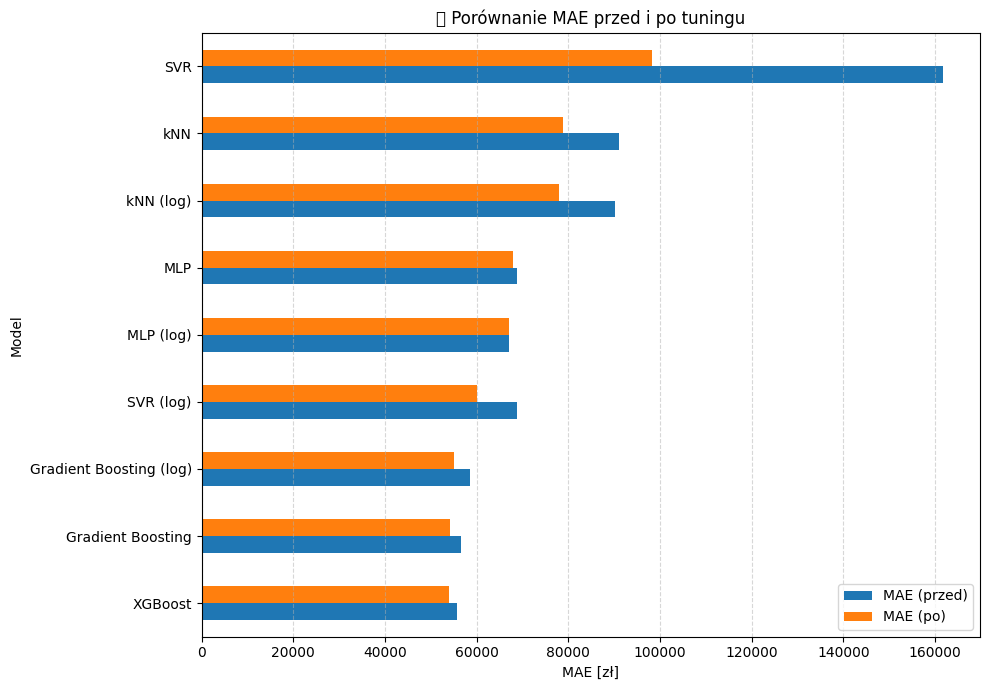

In [114]:
mae_df = pd.DataFrame({
    "Model": [m["Model"] for m in results],
    "MAE (przed)": [m["MAE"] for m in results],
}).merge(
    pd.DataFrame({
        "Model": [m["Model"] for m in results_tuned],
        "MAE (po)": [m["MAE"] for m in results_tuned],
    }),
    on="Model"
)

mae_df.set_index("Model")[["MAE (przed)", "MAE (po)"]].sort_values("MAE (po)", ascending=True).plot(kind="barh", figsize=(10, 7))
plt.title("📉 Porównanie MAE przed i po tuningu")
plt.xlabel("MAE [zł]")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


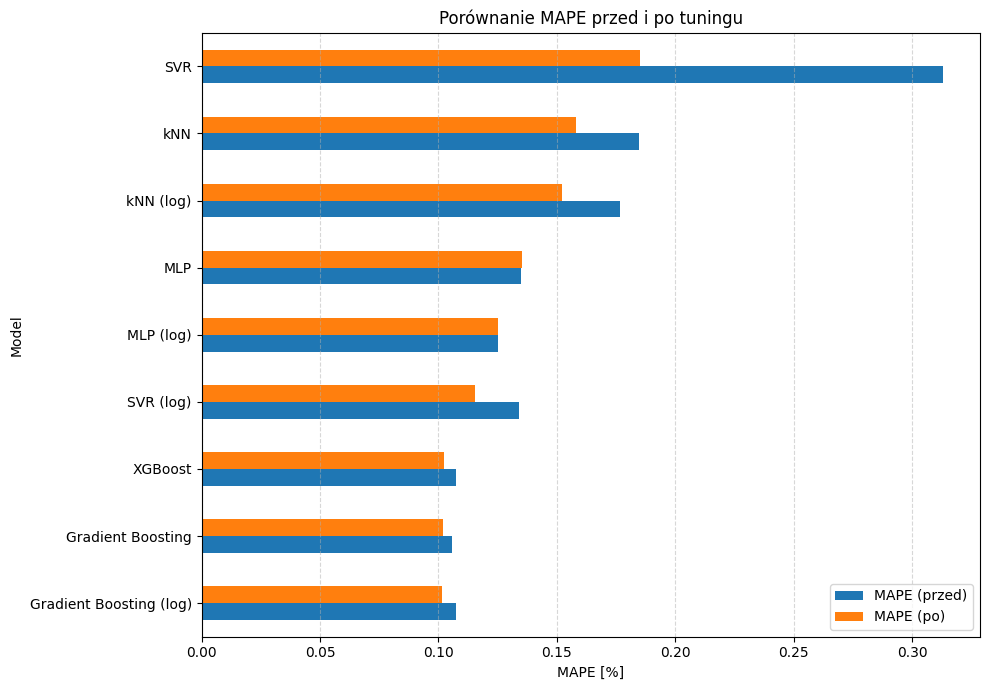

In [115]:
mape_df = pd.DataFrame({
    "Model": [m["Model"] for m in results],
    "MAPE (przed)": [m["MAPE"] for m in results],
}).merge(
    pd.DataFrame({
        "Model": [m["Model"] for m in results_tuned],
        "MAPE (po)": [m["MAPE"] for m in results_tuned],
    }),
    on="Model"
)

mape_df.set_index("Model")[["MAPE (przed)", "MAPE (po)"]].sort_values("MAPE (po)", ascending=True).plot(kind="barh", figsize=(10, 7))
plt.title("Porównanie MAPE przed i po tuningu")
plt.xlabel("MAPE [%]")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [116]:
avg_price = data["price"].mean()
print(f"📊 Średnia cena mieszkania: {avg_price:,.0f} zł".replace(",", " "))


📊 Średnia cena mieszkania: 555 692 zł


In [117]:
data.head(10)

,price,area_m2,rooms,year_built,floor_num,max_floor,distance_from_centre,market_type_wtórny,finish_do wykończenia,finish_do zamieszkania,...,building_type_kamienica,building_type_unknown,elevator_tak,extra_balkon,extra_taras,extra_piwnica,extra_garaż/miejsce_parkingowe,extra_pom._użytkowe,extra_ogródek,extra_oddzielna_kuchnia
0,547000.0,49.50,3,2023.0,5.0,10.0,0.92,True,False,True,...,False,False,True,True,False,True,False,False,False,True
1,499000.0,36.13,2,2024.0,10.0,26.0,0.00,False,True,False,...,False,False,True,False,False,False,True,False,False,False
2,473000.0,48.00,3,1970.0,2.0,4.0,0.00,True,False,True,...,False,False,False,False,False,True,False,False,False,False
3,938790.0,76.95,4,2026.0,0.0,2.0,6.00,False,True,False,...,False,False,False,False,True,False,True,True,True,False
4,947339.0,75.46,4,2026.0,7.0,11.0,0.00,False,True,False,...,False,True,True,False,False,False,True,False,False,False
5,561540.0,53.48,3,2023.0,9.0,9.0,4.14,False,True,False,...,False,False,True,True,False,False,True,True,False,False
6,569269.0,41.86,2,2026.0,4.0,4.0,4.03,False,True,False,...,False,False,True,True,False,False,True,False,False,False
7,595000.0,85.00,4,2025.0,0.0,1.0,8.63,False,True,False,...,False,True,False,True,True,False,True,True,True,True
8,385000.0,47.00,2,1963.0,3.0,4.0,4.03,True,False,True,...,False,False,False,True,False,True,False,True,False,True
9,278000.0,26.50,1,2023.0,4.0,4.0,0.00,True,True,False,...,True,False,False,False,False,False,False,False,False,False
